
# Estadística de pozos

Analisis estadistico de historico de pozos

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats

In [2]:
pd.set_option('display.max_rows', 1_000_000)
pd.set_option('display.max_columns', 1_000_000)
pd.set_option('display.width', 1_000_000)
pd.set_option('precision', 2)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
import timeit
tic=timeit.default_timer()
toc=timeit.default_timer()
toc - tic #elapsed time in seconds

4.84610000057728e-05

<div class="alert alert-block alert-danger">

### <b>Check Harmonic Equation</b>
<br>
· b should be = 1, check bounds argument in harmonic_equation
<br>
· automate unique_well_list generation
<br>

</div>

In [4]:
def input_pozos(x): 
        
        global pozos
        pozos = pd.DataFrame(columns=["Campo",
                                      "Coordenadas",
                                      "Qo aceite",
                                      "Qo gas"])

        #parts=int(input("Numero de campos: "))
        parts = x

        # !!!!!! Verificar resultado de la funcion format... cambiar a integer
        
        for i in range(parts):
            campo = input("Nombre de Campo: ")
            coordenadas = input("Coordenadas: ".format(campo))
            Qo_aceite = input("Qo aceite: ".format(campo))
            Qo_gas = input("Qo gas: ".format(campo))
            df1 = pd.DataFrame(data=[[campo,coordenadas,Qo_aceite,Qo_gas]],columns=["Campo",
                                                                                    "Coordenadas",
                                                                                    "Qo aceite",
                                                                                    "Qo gas"])
            pozos = pd.concat([pozos,df1], axis=0)

        pozos.index = range(len(pozos.index))

## Estadistica - Kumaza

,Unnamed: 0,fecha,campo,yacimiento,plataforma,pozo,inicio_produccion_aceite,ultima_produccion_aceite,gasto_aceite_Mbd,gasto_agua_Mbd,gasto_gas_MMpcd,gasto_gas_BN_MMpcd,RGA_m3/m3,aceite_acumulado_MMb,agua_acumulada_MMb,gas_acumulado_MMMpc,cima_intervalo_mvbnm,base_intervalo_mvbnm,distancia_superior_intervalo_a_contacto_gas-aceite_(m),fluyente_BEC_o _BN,RGA_pc/bl,nivel_CGA,cima_mv -nivel_CGA,estatus,arriba_abajo_CGA,campo_yacimiento,first_oil,Dias Produciendo,days_online,Exponential_Predicted,Hyperbolic_Predicted,Harmonic_Predicted
0,0,2016-01-31,KU,KU_CCE,KU-A,KU-10,02/28/86,31/01/16,1.22,0.01,2.30,1.79,nan,9.93,0.13,5.87,"2,585.00","2,603.00",-,BN,"1,889.96",2919.2,-334.2,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,0,0,1.22,0.60,0.61
1,178,2016-02-29,KU,KU_CCE,KU-A,KU-10,02/28/86,29/02/16,0.15,0.01,0.28,0.40,331.05,9.93,0.13,5.87,"2,585.00","2,603.00",-,BN,"1,858.69",2924.518217,-339.518217,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,29,29,0.00,0.60,0.60
2,357,2016-03-31,KU,KU_CCE,KU-A,KU-10,02/28/86,31/03/16,0.44,0.10,0.90,2.05,367.06,9.94,0.14,5.90,"2,585.00","2,603.00",-,BN,"2,060.87",2918.6,-333.6,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,60,60,0.00,0.59,0.59
3,538,2016-04-30,KU,KU_CCE,KU-A,KU-10,02/28/86,30/04/16,0.44,0.03,0.97,1.81,389.10,9.96,0.14,5.93,"2,585.00","2,603.00",-,BN,"2,184.62",2918.6,-333.6,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,90,90,0.00,0.59,0.59
4,719,2016-05-31,KU,KU_CCE,KU-A,KU-10,02/28/86,31/05/16,0.45,0.07,0.98,2.61,388.96,9.97,0.14,5.96,"2,585.00","2,603.00",-,BN,"2,183.85",2923.5,-338.5,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,121,121,0.00,0.58,0.58


Index(['Unnamed: 0', 'fecha', 'campo', 'yacimiento', 'plataforma', 'pozo', 'inicio_produccion_aceite', 'ultima_produccion_aceite', 'gasto_aceite_Mbd', 'gasto_agua_Mbd', 'gasto_gas_MMpcd', 'gasto_gas_BN_MMpcd', 'RGA_m3/m3', 'aceite_acumulado_MMb', 'agua_acumulada_MMb', 'gas_acumulado_MMMpc', 'cima_intervalo_mvbnm', 'base_intervalo_mvbnm', 'distancia_superior_intervalo_a_contacto_gas-aceite_(m)', 'fluyente_BEC_o _BN', 'RGA_pc/bl', 'nivel_CGA', 'cima_mv -nivel_CGA', 'estatus', 'arriba_abajo_CGA', 'campo_yacimiento', 'first_oil', 'Dias Produciendo', 'days_online', 'Exponential_Predicted', 'Hyperbolic_Predicted', 'Harmonic_Predicted'], dtype='object')

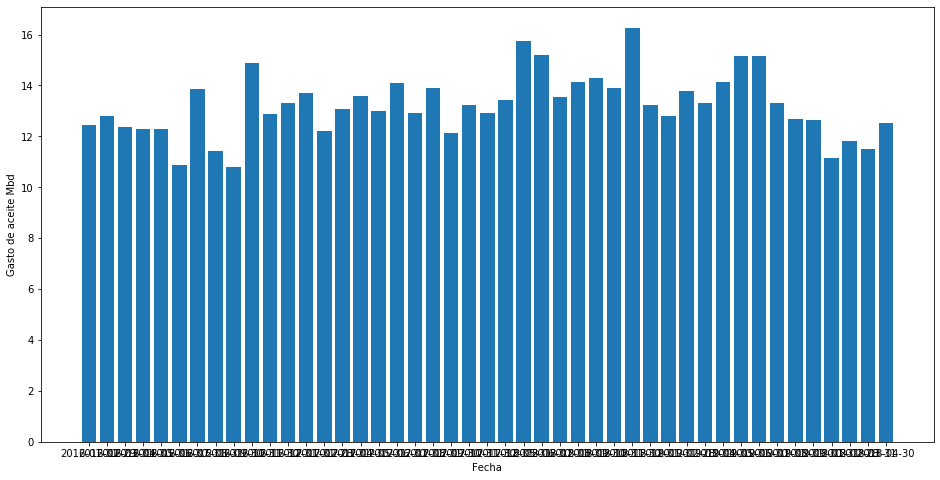

In [5]:
df=pd.read_csv(r'/Users/fffte/ainda_drive/python/csv/benchmark/kumaza_dca.csv',
               parse_dates=True)
display(df.head(),df.columns)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(df.fecha,df.gasto_aceite_Mbd)
ax.set_xlabel('Fecha')
ax.set_ylabel('Gasto de aceite Mbd')
plt.show()
#df.gasto_gas_MMpcd.plot(figsize=(20,10),cmap='viridis')

## Dispersion Analysis

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs


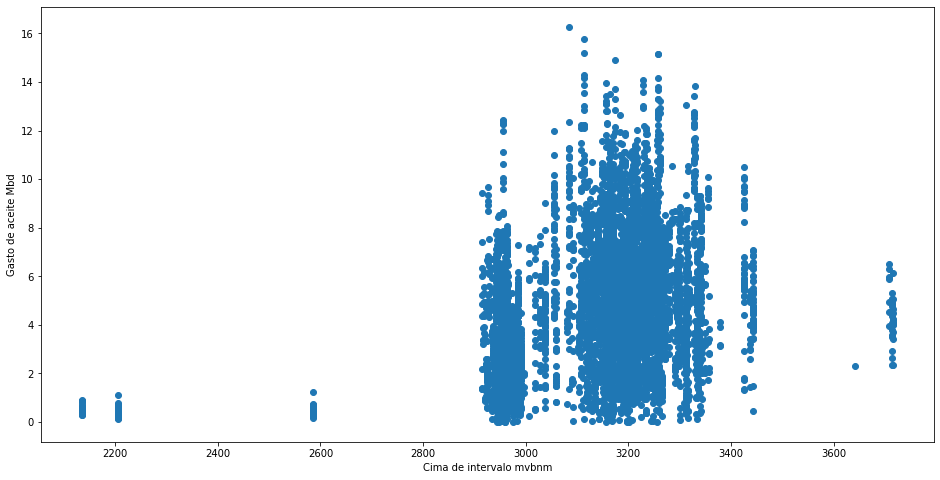

In [6]:
%time 

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['cima_intervalo_mvbnm'],df['gasto_aceite_Mbd'])
ax.set_xlabel('Cima de intervalo mvbnm')
ax.set_ylabel('Gasto de aceite Mbd')
plt.show()

In [7]:
display(df.head(),df.shape)
unique_well_list=pd.unique(list(df.pozo))
display(unique_well_list.shape, len(unique_well_list))

,Unnamed: 0,fecha,campo,yacimiento,plataforma,pozo,inicio_produccion_aceite,ultima_produccion_aceite,gasto_aceite_Mbd,gasto_agua_Mbd,gasto_gas_MMpcd,gasto_gas_BN_MMpcd,RGA_m3/m3,aceite_acumulado_MMb,agua_acumulada_MMb,gas_acumulado_MMMpc,cima_intervalo_mvbnm,base_intervalo_mvbnm,distancia_superior_intervalo_a_contacto_gas-aceite_(m),fluyente_BEC_o _BN,RGA_pc/bl,nivel_CGA,cima_mv -nivel_CGA,estatus,arriba_abajo_CGA,campo_yacimiento,first_oil,Dias Produciendo,days_online,Exponential_Predicted,Hyperbolic_Predicted,Harmonic_Predicted
0,0,2016-01-31,KU,KU_CCE,KU-A,KU-10,02/28/86,31/01/16,1.22,0.01,2.30,1.79,nan,9.93,0.13,5.87,"2,585.00","2,603.00",-,BN,"1,889.96",2919.2,-334.2,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,0,0,1.22,0.60,0.61
1,178,2016-02-29,KU,KU_CCE,KU-A,KU-10,02/28/86,29/02/16,0.15,0.01,0.28,0.40,331.05,9.93,0.13,5.87,"2,585.00","2,603.00",-,BN,"1,858.69",2924.518217,-339.518217,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,29,29,0.00,0.60,0.60
2,357,2016-03-31,KU,KU_CCE,KU-A,KU-10,02/28/86,31/03/16,0.44,0.10,0.90,2.05,367.06,9.94,0.14,5.90,"2,585.00","2,603.00",-,BN,"2,060.87",2918.6,-333.6,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,60,60,0.00,0.59,0.59
3,538,2016-04-30,KU,KU_CCE,KU-A,KU-10,02/28/86,30/04/16,0.44,0.03,0.97,1.81,389.10,9.96,0.14,5.93,"2,585.00","2,603.00",-,BN,"2,184.62",2918.6,-333.6,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,90,90,0.00,0.59,0.59
4,719,2016-05-31,KU,KU_CCE,KU-A,KU-10,02/28/86,31/05/16,0.45,0.07,0.98,2.61,388.96,9.97,0.14,5.96,"2,585.00","2,603.00",-,BN,"2,183.85",2923.5,-338.5,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,121,121,0.00,0.58,0.58


(7328, 32)

(222,)

222

count   7,328.00
mean        4.66
std         2.72
min         0.00
25%         2.57
50%         4.46
75%         6.37
max        16.27
Name: gasto_aceite_Mbd, dtype: float64

0.10   1.20
0.50   4.46
0.90   8.36
Name: gasto_aceite_Mbd, dtype: float64

count   7,328.00
mean        4.45
std         2.23
min         0.03
25%         2.77
50%         4.30
75%         5.74
max        12.80
Name: Hyperbolic_Predicted, dtype: float64

0.10   1.70
0.50   4.30
0.90   7.53
Name: Hyperbolic_Predicted, dtype: float64

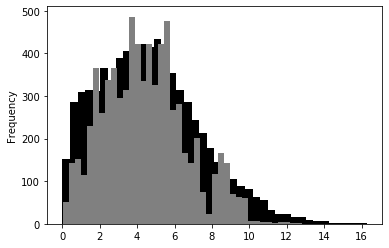

In [8]:
display(df.gasto_aceite_Mbd.describe(),
        df.gasto_aceite_Mbd.quantile([.1,.5,.9]),
        df.Hyperbolic_Predicted.describe(),
        df.Hyperbolic_Predicted.quantile([.1,.5,.9]))
df.gasto_aceite_Mbd.plot.hist(bins=40,color='black'),
df.Hyperbolic_Predicted.plot.hist(bins=40,color='gray')

count   7,328.00
mean        3.66
std         5.25
min         0.00
25%         1.24
50%         2.12
75%         3.52
max        64.57
Name: gasto_gas_MMpcd, dtype: float64

0.10   0.65
0.50   2.12
0.90   7.48
Name: gasto_gas_MMpcd, dtype: float64

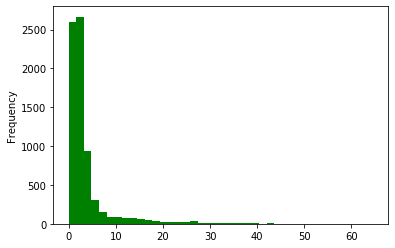

In [9]:
display(df.gasto_gas_MMpcd.describe(),
       df.gasto_gas_MMpcd.quantile([.1,.5,.9]))
df.gasto_gas_MMpcd.plot.hist(bins=40,color='green')

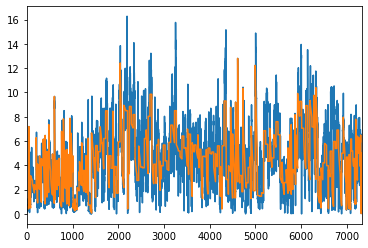

In [10]:
df.gasto_aceite_Mbd.plot()
df.Hyperbolic_Predicted.plot()

# Estadística CAMPOS

In [11]:
import timeit
tic=timeit.default_timer()

mx_stats=pd.read_csv(r'/Users/fffte/ainda_drive/python/csv/benchmark/mexico/pozos/mx_benchmark.csv',
                    low_memory=False)

toc=timeit.default_timer()
toc - tic #elapsed time in seconds

3.6314316810000093

In [12]:
input_campo = input("Nombre de Campo: ")

Nombre de Campo: CORRALILLO


In [14]:
import timeit
tic=timeit.default_timer()

selected_rows=mx_stats.pozo.str.contains(str(input_campo))
campo=mx_stats.loc[selected_rows]

unique_well_list=pd.unique(campo['pozo'])

display('Número de pozos en:',
        input_campo,
        len(unique_well_list),
        unique_well_list,
        campo.shape)


toc=timeit.default_timer()
toc - tic #elapsed time in seconds

'Número de pozos en:'

'CORRALILLO'

252

array(['CORRALILLO-157', 'CORRALILLO-1601', 'CORRALILLO-1612',
       'CORRALILLO-1632', 'CORRALILLO-1651', 'CORRALILLO-1655',
       'CORRALILLO-1695', 'CORRALILLO-2', 'CORRALILLO-301',
       'CORRALILLO-302', 'CORRALILLO-303', 'CORRALILLO-304',
       'CORRALILLO-305', 'CORRALILLO-3067', 'CORRALILLO-307',
       'CORRALILLO-309', 'CORRALILLO-3101', 'CORRALILLO-3103',
       'CORRALILLO-3107', 'CORRALILLO-311', 'CORRALILLO-3113',
       'CORRALILLO-3116', 'CORRALILLO-3119', 'CORRALILLO-312',
       'CORRALILLO-3123', 'CORRALILLO-3135', 'CORRALILLO-314',
       'CORRALILLO-3143', 'CORRALILLO-3144', 'CORRALILLO-3157',
       'CORRALILLO-316', 'CORRALILLO-3163', 'CORRALILLO-3165',
       'CORRALILLO-3166', 'CORRALILLO-3167', 'CORRALILLO-3169',
       'CORRALILLO-3179', 'CORRALILLO-3183', 'CORRALILLO-3189',
       'CORRALILLO-319', 'CORRALILLO-3204', 'CORRALILLO-3206',
       'CORRALILLO-3212', 'CORRALILLO-3214', 'CORRALILLO-3218',
       'CORRALILLO-3226', 'CORRALILLO-323', 'CORRALILLO-

(20353, 10)

1.3456020760000058

In [15]:
import timeit
tic=timeit.default_timer()

display(campo.aceite_Mbd.quantile([.1,.5,.9]))
display(campo.describe())

toc=timeit.default_timer()
toc - tic #elapsed time in seconds

0.10   0.01
0.50   0.02
0.90   0.09
Name: aceite_Mbd, dtype: float64

,Unnamed: 0,aceite_Mbd,agua_Mbd,condensado_Mbd,gas_asociado_MMpcd,gas_no_asociado_MMpcd
count,"20,353.00","20,353.00","20,353.00","20,353.00","20,353.00","20,353.00"
mean,"491,953.86",0.04,0.01,0.00,0.12,0.00
std,"392,346.96",0.07,0.02,0.00,0.17,0.00
min,"2,001.00",0.00,0.00,0.00,0.00,0.00
25%,"104,716.00",0.01,0.00,0.00,0.03,0.00
50%,"456,328.00",0.02,0.00,0.00,0.07,0.00
75%,"889,237.00",0.04,0.01,0.00,0.15,0.00
max,"998,143.00",1.49,0.81,0.00,2.78,0.00


0.10387245600000483

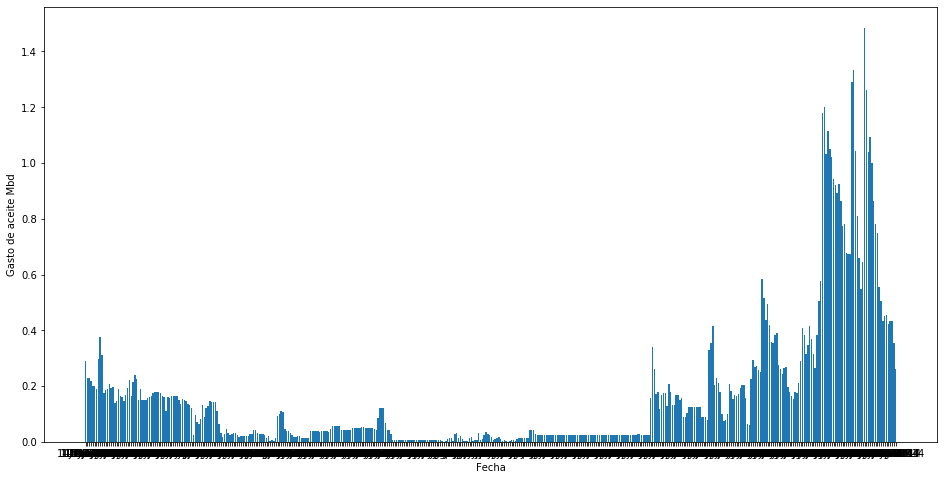

477.629295955

In [17]:
import timeit
tic=timeit.default_timer()

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(campo.fecha,campo.aceite_Mbd)
ax.set_xlabel('Fecha')
ax.set_ylabel('Gasto de aceite Mbd')
plt.show()

toc=timeit.default_timer()
toc - tic #elapsed time in seconds

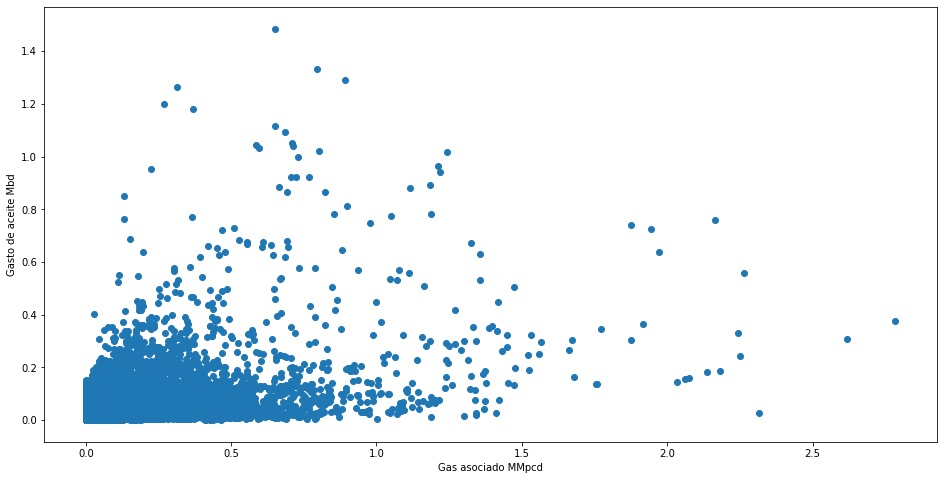

0.3502734030000738

In [18]:
import timeit
tic=timeit.default_timer()

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(campo.gas_asociado_MMpcd,campo.aceite_Mbd)
ax.set_xlabel('Gas asociado MMpcd')
ax.set_ylabel('Gasto de aceite Mbd')
plt.show()


toc=timeit.default_timer()
toc - tic #elapsed time in seconds

0.0859309980000944

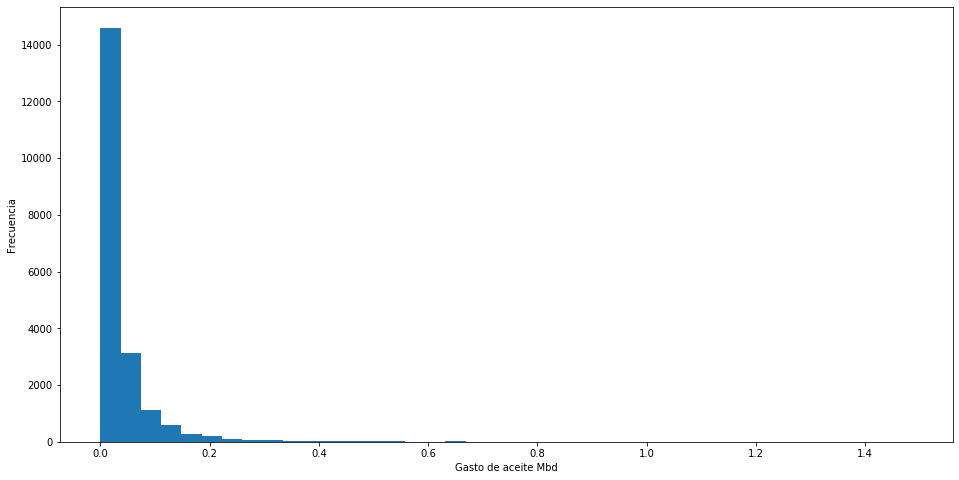

In [19]:
import timeit
tic=timeit.default_timer()

fig, ax = plt.subplots(figsize=(16,8))
ax.hist(campo.aceite_Mbd,
        bins=40,
        cumulative=False,
        density=False)
ax.set_xlabel('Gasto de aceite Mbd')
ax.set_ylabel('Frecuencia')

toc=timeit.default_timer()
toc - tic #elapsed time in seconds

## Q inicial

In [20]:
def get_max_initial_production(df, variable_column, well_column, date_column):
    global df_beginning_production
    global field
    """
    This function allows you to look at the first X months of production, and selects 
    the highest production month as max initial production
    Arguments:
        df: Pandas dataframe. 
        number_first_months: float. Number of months from the point the well comes online
        to compare to get the max initial production rate qi (this looks at multiple months
        in case there is a production ramp-up)
        variable_column: String. Column name for the column where we're attempting to get
        the max volume from (can be either 'Gas' or 'Oil' in this script)
        date_column: String. Column name for the date that the data was taken at 
    """
    #First, sort the data frame from earliest to most recent prod date
    field=campo.sort_values(by=[date_column,well_column])
    num_months=int((len(field))*.20)
    #Pull out the first x months of production, where number_first_months is x
    df_beginning_production=field.head(num_months)
    #Return the max value in the selected variable column from the newly created 
    #df_beginning_production df
    return df_beginning_production[variable_column].max(), num_months, field.shape

In [ ]:
get_max_initial_production(campo,'aceite_Mbd','pozo','fecha')

In [ ]:
df_beginning_production.shape

In [ ]:
for unique_well_list in field:
    display(get_max_initial_production)

# Definir funcion para carga

In [196]:
def estadistica_campo():
    
    input_campo = input("Nombre de Campo: ")
    
    selected_rows=mx_stats.pozo.str.contains(str(input_campo))
    campo=mx_stats.loc[selected_rows]

    display(campo.head(),campo.shape)
    unique_well_list=pd.unique(campo['pozo'])
    display(unique_well_list.shape, len(unique_well_list))
    display(unique_well_list)

    campo.aceite_Mbd.plot.hist(bins=20)
    campo.describe()


    fig, ax = plt.subplots(figsize=(16,8))
    mx_stats
    ax.bar(campo.fecha,campo.aceite_Mbd)
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Gasto de aceite Mbd')
    plt.show()

    fig, ax = plt.subplots(figsize=(16,8))
    ax.scatter(campo.fecha,campo.aceite_Mbd)
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Gasto de aceite Mbd')
    plt.show()

    fig, ax = plt.subplots(figsize=(16,8))
    ax.hist(campo.aceite_Mbd,
            bins=40,
            cumulative=False,
            density=False)
    ax.set_xlabel('Gasto de aceite Mbd')
    ax.set_ylabel('Frecuencia')
    return campo

# DCA

In [ ]:
import timeit
tic=timeit.default_timer()

def read_in_csv(file_path):
    """
    Read in the specified csv as a pandas dataframe
    Arguments: 
        file_path: String. Path for the csv file that we want to read in
    Outputs:
        dataframe: Pandas dataframe.
    """
    well_data=pd.read_csv(file_path,parse_dates=True)
    return well_data

def remove_nan_and_zeroes_from_columns(df, variable):
    """
    This function cleans up a dataframe by removing rows in a specific 
    column that are null/NaN or equal to 0. This basically removes zero 
    production time periods.
    Arguments:
        df: Pandas dataframe.
        variable: String. Name of the column where we want to filter out
        NaN's or 0 values
    Output:
        filtered_df: Pandas dataframe. Dataframe with NaN's and zeroes filtered out of 
        the specified column
    """
    filtered_df = df[(df[variable].notnull()) & (df[variable]>0)]
    return filtered_df

def generate_time_delta_column(df, time_column, date_first_online_column):
    """
    Create column for the time that a well has been online at each reading, with 
    the first non-null month in the series listed as the start of production
    Arguments:
        df: Pandas dataframe
        time_column: String. Name of the column that includes the specific record date
        that the data was taken at. Column type is pandas datetime
        date_first_online_column: Name of the column that includes the date that the
        well came online. Column type is pandas datetime
    Outputs:
        Pandas series containing the difference in days between the date the well
        came online and the date that the data was recorded (cumulative days online)
    """
    df['Dias Produciendo']=(df[time_column]-df[date_first_online_column]).dt.days
    return (df[time_column]-df[date_first_online_column]).dt.days

def get_min_or_max_value_in_column_by_group(dataframe, group_by_column, calc_column, calc_type):
    global value
    """
    This function obtains the min or max value for a column, with a group by applied. For example,
    it could return the earliest (min) RecordDate for each API number in a dataframe 
    Arguments:
        dataframe: Pandas dataframe 
        group_by_column: string. Name of column that we want to apply a group by to
        calc_column: string. Name of the column that we want to get the aggregated max or min for
        calc_type: string; can be either 'min' or 'max'. Defined if we want to pull the min value 
        or the max value for the aggregated column
    Outputs:
        value: Depends on the calc_column type.
    """
    value=dataframe.groupby(group_by_column)[calc_column].transform(calc_type)
    return value

def get_max_initial_production(df, number_first_months, variable_column, date_column):
    global df_beginning_production
    """
    This function allows you to look at the first X months of production, and selects 
    the highest production month as max initial production
    Arguments:
        df: Pandas dataframe. 
        number_first_months: float. Number of months from the point the well comes online
        to compare to get the max initial production rate qi (this looks at multiple months
        in case there is a production ramp-up)
        variable_column: String. Column name for the column where we're attempting to get
        the max volume from (can be either 'Gas' or 'Oil' in this script)
        date_column: String. Column name for the date that the data was taken at 
    """
    #First, sort the data frame from earliest to most recent prod date
    df=df.sort_values(by=date_column)
    #Pull out the first x months of production, where number_first_months is x
    df_beginning_production=df.head(number_first_months)
    #Return the max value in the selected variable column from the newly created 
    #df_beginning_production df
    return df_beginning_production[variable_column].max()

def hyperbolic_equation(t, qi, b, di):
    """
    Hyperbolic decline curve equation
    Arguments:
        t: Float. Time since the well first came online, can be in various units 
        (days, months, etc) so long as they are consistent.
        qi: Float. Initial production rate when well first came online.
        b: Float. Hyperbolic decline constant
        di: Float. Nominal decline rate at time t=0
    Output: 
        Returns q, or the expected production rate at time t. Float.
    """
    return qi/((1.0+b*di*t)**(1.0/b))

def exponential_equation(t, qi, di):
    """
    Exponential decline curve equation
    Arguments:
        t: Float. Time since the well first came online, can be in various units 
        (days, months, etc) so long as they are consistent.
        qi: Float. Initial production rate when well first came online.
        di: Float. Nominal decline rate (constant)
    Output: 
        Returns q, or the expected production rate at time t. Float.
    """
    return qi*np.exp(-di*t)

def harmonic_equation (t, qi, di):
    """
    Harmonic decline curve equation
    Arguments:
        t: Float. Time since the well first came online, can be in various units 
        (days, months, etc) so long as they are consistent.
        qi: Float. Initial production rate when well first came online.
        di: Float. Nominal decline rate (constant)
    Output: 
        Returns q, or the expected production rate at time t. Float.
    """
    return qi/(1+(di*t))

def plot_actual_vs_predicted_by_equations(df, x_variable, y_variables, plot_title):
    """
    This function is used to map x- and y-variables against each other
    Arguments:
        df: Pandas dataframe.
        x_variable: String. Name of the column that we want to set as the 
        x-variable in the plot
        y_variables: string (single), or list of strings (multiple). Name(s) 
        of the column(s) that we want to set as the y-variable in the plot
    """
    #Plot results
    df.plot(x=x_variable, y=y_variables, title=plot_title,figsize=(10,5))
    plt.show()

def main(file_path):
    global well_data
    global production_time_series
    global results
    results=pd.DataFrame()
    #Read in the monthly oil and gas data
    #file_path=r'/Users/fffte/Documents/GitHub/Ainda/Proyecto Newton/02_productividad/kumaza_produccion.csv'
    well_data=read_in_csv(file_path)
    #Perform some data cleaning to get the columns as the right data type
    well_data['fecha']=pd.to_datetime(well_data['fecha'])
    #Declare the desired product that we want to curve fit for--it can either by 'Gas' or 'Oil'
    hydrocarbon='gasto_aceite_Mbd'
    #Remove all rows with null values in the desired time series column
    well_data=remove_nan_and_zeroes_from_columns(well_data, hydrocarbon)
    #Get a list of unique wells to loop through
    unique_well_list=pd.unique(list(well_data.pozo))
    #Get the earliest RecordDate for each Well
    well_data['inicio_produccion_aceite']= get_min_or_max_value_in_column_by_group(well_data, group_by_column='pozo', 
                  calc_column='fecha', calc_type='min')
    #Generate column for time online delta
    well_data['days_online']=generate_time_delta_column(well_data, time_column='fecha', 
                  date_first_online_column='inicio_produccion_aceite')
    #Pull data that came online between an specified range
    well_data_range=well_data[(well_data.fecha>='2016-01-01') & (well_data.fecha<='2019-12-01')]
    #Loop through each well, and perform calculations
    for pozo in unique_well_list:
        #Subset the dataframe by Well
        production_time_series=well_data_range[well_data_range.pozo==pozo]
        #Get the highest value of production in the first X months of production, to use as qi value
        qi=get_max_initial_production(production_time_series, 6, hydrocarbon, 'fecha')
        #Exponential curve fit the data to get best fit equation
        popt_exp, pcov_exp=curve_fit(exponential_equation, production_time_series['days_online'], 
                                     production_time_series[hydrocarbon],bounds=(0, [qi,10]))
        #print('Exponential Fit Curve-fitted Variables: qi='+str(popt_exp[0])+', di='+str(popt_exp[1]))
        #Hyperbolic curve fit the data to get best fit equation
        popt_hyp, pcov_hyp=curve_fit(hyperbolic_equation, production_time_series['days_online'], 
                                     production_time_series[hydrocarbon],bounds=(0, [qi,2,10]))
        #print('Hyperbolic Fit Curve-fitted Variables: qi='+str(popt_hyp[0])+', b='+str(popt_hyp[1])+', di='+str(popt_hyp[2]))
        #Harmonic curve fit the data to get best fit equation
        popt_harm, pcov_harm=curve_fit(harmonic_equation, production_time_series['days_online'], 
                                     production_time_series[hydrocarbon],bounds=(0, [qi,10]))
        #print('Harmonic Fit Curve-fitted Variables: qi='+str(popt_harm[0])+', b='+str(popt_harm[0])+', di='+str(popt_harm[1]))
        #Exponential fit results
        production_time_series.loc[:,'Exponential_Predicted']=exponential_equation(production_time_series['days_online'], 
                                  *popt_exp)
        #Hyperbolic fit results
        production_time_series.loc[:,'Hyperbolic_Predicted']=hyperbolic_equation(production_time_series['days_online'], 
                                  *popt_hyp)
        #Harmonic fit results
        production_time_series.loc[:,'Harmonic_Predicted']=harmonic_equation(production_time_series['days_online'], 
                                  *popt_harm)
        
        results=results.append(production_time_series)
        #Declare the x- and y- variables that we want to plot against each other
        y_variables=[hydrocarbon, "Hyperbolic_Predicted", "Exponential_Predicted","Harmonic_Predicted"]
        x_variable='days_online'
        #Create the plot title
        plot_title=hydrocarbon+' for '+str(pozo)
        #Plot the data to visualize the equation fit
        #plot_actual_vs_predicted_by_equations(production_time_series, x_variable, y_variables, plot_title)
                
if __name__== "__main__":
    main(r'C:\Users\elias\Google Drive\python\csv\benchmark\kumaza_produccion.csv')

toc=timeit.default_timer()
toc - tic #elapsed time in seconds